## Step 1. Open data and examine the general information

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math
from matplotlib import pyplot as plt
from scipy import stats as st


In [2]:
calls = pd.read_csv('datasets/calls.csv')
internet = pd.read_csv('datasets/internet.csv')
messages = pd.read_csv('datasets/messages.csv')
tariffs = pd.read_csv('datasets/tariffs.csv')
users = pd.read_csv('datasets/users.csv')

In [3]:
def basic_info(df):
    print(df.head())
    print()
    print(df.info())
    print()
    print(df.describe())

In [4]:
basic_info(calls)

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


In [5]:
basic_info(internet)

   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     14

In [6]:
basic_info(messages)

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000


In [7]:
basic_info(tariffs)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tarif

In [8]:
basic_info(users)

   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   t

<b>Results</b>

1. **Calls**: Date in wrong format, no missing values, id - we can use it to check if we have duplicates
3. **Internet**: unnamed column is probably duplication of the index, id - similarly to calls to check duplication, mb_used - we will round it up. session_date - convert to a date. user_id - connects table to others
4. **Messages** - once again we have useless id
5. **Tariffs** - table doesn't need preprocessing
6. **Users** - churn_date - I need to think about how to use

All data can be connected via user_id

## Step 2: Data preprocessing

### Calls

In [9]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [11]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [12]:
calls['id'].duplicated().sum()

0

In [13]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] = calls['duration'].astype('int64') 

In [14]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


We analyze the distribution of the proportion of calls with 0 seconds to assess how important they are. Maybe they will lead to a situation where a user will be dropped completely if we drop this calls

In [15]:
x = pd.DataFrame()
row = []
for y in calls['user_id'].unique():
    row.append([y, calls.query('user_id == @y')['id'].count(), \
               calls.query('user_id ==@y and duration == 0')['id'].count()])
x = pd.DataFrame(row, columns=["user_id", "calls", '0calls'])
x['share0'] = x['0calls'] / x['calls'] * 100

In [16]:
x.head()

,user_id,calls,0calls,share0
0,1000,368,75,20.380435
1,1001,122,30,24.590164
2,1002,217,44,20.276498
3,1003,520,92,17.692308
4,1004,176,37,21.022727


In [17]:
x.describe()

,user_id,calls,0calls,share0
count,492.000000,492.000000,492.000000,492.000000
mean,1249.050813,411.802846,80.514228,19.612180
std,144.325595,291.803375,57.484309,2.950837
min,1000.000000,14.000000,5.000000,8.771930
25%,1124.750000,180.000000,35.750000,18.086354
50%,1249.500000,344.500000,66.000000,19.565217
75%,1374.250000,589.500000,114.000000,20.926871
max,1499.000000,1760.000000,336.000000,50.000000


The share of calls with 0 time is relatively the same throughout the sample - the mean and median are close, the 1st and 3rd quartiles are also as close as possible to each other. So there is almost no difference between users how often they have 0 calls

In [18]:
len(calls['user_id'].unique())

492

**Results**

1. Calls table has data for 492 users
2. Calls that lasted 0 seconds are almost half of all calls - it is better to remove them for calculating the dispersion and other statistical measurements. For now, we can leave them for a general description (maybe put them in a separate category). 
3. Date converted to correct format + call time to int after rounding

### internet

In [19]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


We see, that Unnamed column is exactly the same as our index

<AxesSubplot:xlabel='index', ylabel='Unnamed: 0'>

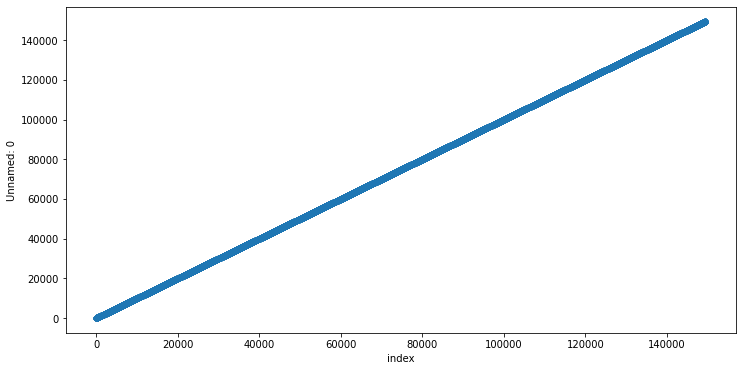

In [20]:
fig, axes = plt.subplots( facecolor='white', figsize=(12, 6))


internet.reset_index().plot.scatter(x = 'index', y = 'Unnamed: 0', ax=axes)

In [21]:
internet = internet.drop(['Unnamed: 0'], axis=1)

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [23]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [24]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet['mb_used'] = internet['mb_used'].astype('int64') 

In [25]:
internet['id'].duplicated().sum()

0

In [26]:
internet.query('user_id == 1000 and session_date == "2018-08-28"').head(20)

,id,mb_used,session_date,user_id
11,1000_11,0,2018-08-28,1000
27,1000_27,800,2018-08-28,1000
35,1000_35,661,2018-08-28,1000


We can have several sessions by user with 0 traffic

In [27]:
print(internet.query('mb_used == 0')['user_id'].count())
print(internet.query('mb_used == 0')['user_id'].value_counts().head(5))

19598
1204    144
1496    141
1429    125
1119    124
1227    121
Name: user_id, dtype: int64


In [28]:
internet.query('user_id == 1204 and session_date == "2018-12-08"').head(20)

,id,mb_used,session_date,user_id
59933,1204_18,0,2018-12-08,1204
59934,1204_19,114,2018-12-08,1204
60279,1204_364,0,2018-12-08,1204
60524,1204_609,579,2018-12-08,1204


<b>Results </b>

1. Dropped unnamed column
2. date converted to the correct format + internet traffic to int after rounding
3. We have sessions with 0 traffic - around 13% of all the sessions. Maybe they initialized connection but then srtopped or used free services that didn't count toards traffic limit. Regardless this is something to note, but it won't affect our tasks

### Messages


In [29]:
messages['id'].duplicated().sum()

0

In [30]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

<b>Results </b>

1. date converted to the correct format

### tariffs


In [31]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<b>Results </b>

1. There is no need for preprocessing

### users

In [32]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [33]:
users.query('churn_date.notna()').head(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


In [34]:
user_left = users.query('churn_date.notna()')
user_left = user_left.reset_index()

Attempted to find errors where we have calls/messages/internet use after the the churn_date (date when the user stopped using tariff). There is no such errors in DB

In [35]:
temp = pd.DataFrame()
for x in range(len(user_left)):
    ch_date = user_left.at[x,'churn_date']
    user = user_left.at[x,'user_id']
    y = calls.query('user_id == @user and call_date > @ch_date')['id'].count()
    y1 = internet.query('user_id == @user and session_date > @ch_date')['id'].count()
    y2 = messages.query('user_id == @user and message_date > @ch_date')['id'].count()
    temp2 = pd.DataFrame({'user_id': user, 'calls_af_exit': y, 'internet_af_exit': y1, 'messages_af_exit': y2}, index=[0])
    temp = pd.concat([temp, temp2], axis=0, ignore_index=True)
temp['sum_all'] = temp['calls_af_exit'] + temp['internet_af_exit']+ temp['messages_af_exit']
temp.query('sum_all > 0')

,user_id,calls_af_exit,internet_af_exit,messages_af_exit,sum_all


In [36]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [37]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [38]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [39]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [40]:
len(users['user_id'].unique())

500

<b> Results </b>

1. Checked for errors with users who left - there are no situations where activity was logged after the exit date
2. The names of cities have no errors
3. Calls with 0 duration are not particularly important for analysis, they don't affect the main parameters that we use

It can be considered separately in each table Calls, Int, etc. But the risk that when analyzing calls we will forget about customers who did not call. The option is to take the format table - user_id, month, tariff and then how much it required for them.
It must be taken into account that different people came at different times - to somehow take into account that they were not always all month in the tariff and so on.

We can make one table to summarize data for each user

### Preparing pivot table

In [41]:
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month
users['reg_day'] = pd.DatetimeIndex(users['reg_date']).day


In [42]:
users['churn_month'] = pd.DatetimeIndex(users['churn_date']).month
users['churn_day'] = pd.DatetimeIndex(users['churn_date']).day
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   age          500 non-null    int64         
 2   churn_date   38 non-null     datetime64[ns]
 3   city         500 non-null    object        
 4   first_name   500 non-null    object        
 5   last_name    500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   tariff       500 non-null    object        
 8   reg_month    500 non-null    int64         
 9   reg_day      500 non-null    int64         
 10  churn_month  38 non-null     float64       
 11  churn_day    38 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 47.0+ KB


We analyze whether the client used tariff for the whole months or not. If the client started using company's services in the middle of the month - then the use statistics for that month will need to be adjusted (if the client made 100 calls in 15 days he will make 200 calls in the whole month)

In [43]:
overall = pd.DataFrame()
row = []
m = 0

for user in users['user_id'].unique():
    r_m = users.loc[users['user_id'] == user, 'reg_month'].iloc[0]
    r_d = users.loc[users['user_id'] == user, 'reg_day'].iloc[0]
    z = users.loc[users['user_id'] == user, 'reg_date'].iloc[0]
    z = pd.Period(z, freq='H').days_in_month
    c_m = users.loc[users['user_id'] == user, 'churn_month'].iloc[0]
    c_d = users.loc[users['user_id'] == user, 'churn_day'].iloc[0]
    for month in range(1, 13):
        if math.isnan(c_m) == True:
            if r_m == month:
                month_share = (z-r_d+1) / z
                row.append([user, month, month_share])
            elif r_m < month:
                row.append([user, month, 1])
        else:
            if r_m == month:
                if c_m == month:
                    month_share = (c_d-r_d+1) / z
                    row.append([user, month, month_share])                    
                else:
                    month_share = (z-r_d+1) / z
                    row.append([user, month, month_share])
            elif r_m < month:
                if c_m == month:
                    month_share = (c_d) / z
                    row.append([user, month, month_share])                    
                else:
                    row.append([user, month, 1])
overall = pd.DataFrame(row, columns=["user_id", "month", 'month_share'])

In [44]:
overall

,user_id,month,month_share
0,1000,5,0.225806
1,1000,6,1.000000
2,1000,7,1.000000
3,1000,8,1.000000
4,1000,9,1.000000
...,...,...,...
3254,1498,12,1.000000
3255,1499,9,0.133333
3256,1499,10,1.000000
3257,1499,11,1.000000


In [45]:
calls['call_month'] = pd.DatetimeIndex(calls['call_date']).month
internet['session_month'] = pd.DatetimeIndex(internet['session_date']).month
messages['message_month'] = pd.DatetimeIndex(messages['message_date']).month

In [46]:
x = pd.pivot_table(calls, values='duration', index=['user_id', 'call_month'], aggfunc='sum')
overall = overall.merge(x, left_on=['user_id', 'month'], right_on=['user_id', 'call_month'], how='left')

In [47]:
x = pd.pivot_table(calls, values='duration', index=['user_id', 'call_month'], aggfunc='count')
overall = overall.merge(x, left_on=['user_id', 'month'], right_on=['user_id', 'call_month'], how='left')

In [48]:
x = pd.pivot_table(calls.query('duration == 0'), values='duration', index=['user_id', 'call_month'], aggfunc='count')
overall = overall.merge(x, left_on=['user_id', 'month'], right_on=['user_id', 'call_month'], how='left')

In [49]:
x = pd.pivot_table(internet, values='mb_used', index=['user_id', 'session_month'], aggfunc='sum')
overall = overall.merge(x, left_on=['user_id', 'month'], right_on=['user_id', 'session_month'], how='left')

In [50]:
x = pd.pivot_table(messages, values='id', index=['user_id', 'message_month'], aggfunc='count')
overall = overall.merge(x, left_on=['user_id', 'month'], right_on=['user_id', 'message_month'], how='left')

In [51]:
overall.rename(columns={'id':'messages'}, inplace=True)
overall.rename(columns={'duration_x':'call_duration'}, inplace=True)
overall.rename(columns={'duration_y':'calls'}, inplace=True)
overall.rename(columns={'duration':'calls_0min'}, inplace=True)
overall = overall.fillna(0)
overall

,user_id,month,month_share,call_duration,calls,calls_0min,mb_used,messages
0,1000,5,0.225806,159.0,22.0,5.0,2256.0,22.0
1,1000,6,1.000000,172.0,43.0,15.0,23257.0,60.0
2,1000,7,1.000000,340.0,47.0,6.0,14016.0,75.0
3,1000,8,1.000000,408.0,52.0,10.0,14070.0,81.0
4,1000,9,1.000000,466.0,58.0,12.0,14581.0,57.0
...,...,...,...,...,...,...,...,...
3254,1498,12,1.000000,0.0,0.0,0.0,0.0,0.0
3255,1499,9,0.133333,70.0,9.0,1.0,1848.0,11.0
3256,1499,10,1.000000,449.0,68.0,24.0,17809.0,48.0
3257,1499,11,1.000000,612.0,74.0,12.0,17984.0,59.0


In [52]:
overall['call_duration_e'] = overall['call_duration'] / overall['month_share']
overall['mb_used_e'] = overall['mb_used'] / overall['month_share']
overall['messages_e'] = overall['messages'] / overall['month_share']
overall['calls_e'] = overall['calls'] / overall['month_share']
overall['calls_0min_e'] = overall['calls_0min'] / overall['month_share']

In [53]:
overall['call_duration_e'] = overall['call_duration_e'].astype('int64') 
overall['mb_used_e'] = overall['mb_used_e'].astype('int64') 
overall['messages_e'] = overall['messages_e'].astype('int64') 
overall['calls_e'] = overall['calls_e'].astype('int64') 
overall['calls_0min_e'] = overall['calls_0min_e'].astype('int64') 

In [54]:
overall = pd.merge(overall,users[['user_id','tariff', 'city']],on='user_id', how='left')

The table shows data for each month and each user, how many services were used in that month. Columns that end with 'e' (call_duration_e) are extrapolated data for months that users where customers only partially 

In [55]:
overall

,user_id,month,month_share,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,mb_used_e,messages_e,calls_e,calls_0min_e,tariff,city
0,1000,5,0.225806,159.0,22.0,5.0,2256.0,22.0,704,9990,97,97,22,ultra,Краснодар
1,1000,6,1.000000,172.0,43.0,15.0,23257.0,60.0,172,23257,60,43,15,ultra,Краснодар
2,1000,7,1.000000,340.0,47.0,6.0,14016.0,75.0,340,14016,75,47,6,ultra,Краснодар
3,1000,8,1.000000,408.0,52.0,10.0,14070.0,81.0,408,14070,81,52,10,ultra,Краснодар
4,1000,9,1.000000,466.0,58.0,12.0,14581.0,57.0,466,14581,57,58,12,ultra,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1498,12,1.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,smart,Владикавказ
3255,1499,9,0.133333,70.0,9.0,1.0,1848.0,11.0,525,13860,82,67,7,smart,Пермь
3256,1499,10,1.000000,449.0,68.0,24.0,17809.0,48.0,449,17809,48,68,24,smart,Пермь
3257,1499,11,1.000000,612.0,74.0,12.0,17984.0,59.0,612,17984,59,74,12,smart,Пермь


In [56]:
overall.query('tariff == "ultra"').describe()

,user_id,month,month_share,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,mb_used_e,messages_e,calls_e,calls_0min_e
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,1262.649105,8.313121,0.917081,515.630219,71.860835,13.860835,19080.117296,48.333002,589.998012,22010.067594,54.974155,82.170974,15.894632
std,140.292456,2.876283,0.223285,323.171560,44.705632,9.292511,10371.828992,47.826442,811.102937,28423.734357,72.029826,108.931429,20.718748
min,1000.000000,1.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1143.000000,6.000000,1.000000,272.000000,38.000000,7.000000,11296.250000,5.000000,331.500000,14039.250000,6.000000,45.250000,8.000000
50%,1277.000000,9.000000,1.000000,508.000000,72.000000,13.000000,19033.500000,37.000000,550.500000,20440.000000,42.000000,78.000000,14.000000
75%,1380.000000,11.000000,1.000000,749.250000,102.000000,20.000000,26693.000000,78.000000,767.000000,27748.750000,83.000000,107.000000,21.000000
max,1495.000000,12.000000,1.000000,1673.000000,244.000000,54.000000,49789.000000,224.000000,23436.000000,824817.000000,1601.000000,3100.000000,558.000000


In [57]:
overall.query('tariff == "smart"').describe()

,user_id,month,month_share,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,mb_used_e,messages_e,calls_e,calls_0min_e
count,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000
mean,1246.479361,8.379494,0.921441,413.482912,57.840657,11.393253,16056.307590,33.028407,470.274745,18279.726587,36.648025,65.653795,12.819352
std,146.392730,2.922970,0.212852,194.100433,26.490437,6.041875,6079.046729,28.285544,481.772445,19888.333633,38.950280,65.126138,12.240367
min,1001.000000,1.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1121.000000,6.000000,1.000000,279.000000,39.000000,7.000000,12517.000000,9.000000,329.000000,13993.000000,12.000000,46.000000,8.000000
50%,1239.000000,9.000000,1.000000,419.000000,59.000000,11.000000,16457.000000,28.000000,452.000000,17282.000000,31.000000,64.000000,12.000000
75%,1376.000000,11.000000,1.000000,544.000000,76.000000,15.000000,20034.000000,51.000000,567.000000,20770.000000,54.000000,79.000000,16.000000
max,1499.000000,12.000000,1.000000,1435.000000,198.000000,36.000000,38610.000000,143.000000,17701.000000,622108.000000,961.000000,2325.000000,403.000000


If we use extrapolated values we can find unusual situations. For example user 1336 made 100 calls in 1 day. He started using tariff on Dec 31st. 

In this situation we can't extrapolate this behavior on the rest of the month

In [58]:
overall.sort_values(by='call_duration_e', ascending=False)

,user_id,month,month_share,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,mb_used_e,messages_e,calls_e,calls_0min_e,tariff,city
2158,1336,12,0.032258,756.0,100.0,18.0,26607.0,20.0,23436,824817,620,3100,558,ultra,Уфа
894,1140,12,0.032258,571.0,75.0,13.0,20068.0,31.0,17701,622108,961,2325,403,smart,Киров
484,1074,12,0.064516,580.0,74.0,10.0,21923.0,3.0,8990,339806,46,1147,155,smart,Якутск
1661,1258,12,0.032258,219.0,39.0,8.0,18718.0,8.0,6789,580258,248,1209,248,smart,Санкт-Петербург
3181,1485,12,0.096774,584.0,94.0,22.0,23447.0,155.0,6034,242285,1601,971,227,ultra,Киров
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,1489,11,1.000000,0.0,0.0,0.0,17516.0,20.0,0,17516,20,0,0,smart,Санкт-Петербург
3194,1489,10,1.000000,0.0,0.0,0.0,19588.0,21.0,0,19588,21,0,0,smart,Санкт-Петербург
3193,1489,9,1.000000,0.0,0.0,0.0,17232.0,32.0,0,17232,32,0,0,smart,Санкт-Петербург
3192,1489,8,0.548387,0.0,0.0,0.0,11066.0,17.0,0,20179,31,0,0,smart,Санкт-Петербург


In [59]:
users.query('user_id == 1336')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,reg_day,churn_month,churn_day
336,1336,27,NaT,Уфа,Авксентий,Алексеичев,2018-12-31,ultra,12,31,NaN,NaN


In [60]:
overall.query('user_id == 1336')

,user_id,month,month_share,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,mb_used_e,messages_e,calls_e,calls_0min_e,tariff,city
2158,1336,12,0.032258,756.0,100.0,18.0,26607.0,20.0,23436,824817,620,3100,558,ultra,Уфа


In [61]:
calls.query('user_id == 1336')

,id,call_date,duration,user_id,call_month
131111,1336_0,2018-12-31,6,1336,12
131112,1336_1,2018-12-31,4,1336,12
131113,1336_2,2018-12-31,13,1336,12
131114,1336_3,2018-12-31,14,1336,12
131115,1336_4,2018-12-31,9,1336,12
...,...,...,...,...,...
131206,1336_95,2018-12-31,13,1336,12
131207,1336_96,2018-12-31,14,1336,12
131208,1336_97,2018-12-31,0,1336,12
131209,1336_98,2018-12-31,6,1336,12


### Adding revenue

In [62]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [63]:
overall

,user_id,month,month_share,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,mb_used_e,messages_e,calls_e,calls_0min_e,tariff,city
0,1000,5,0.225806,159.0,22.0,5.0,2256.0,22.0,704,9990,97,97,22,ultra,Краснодар
1,1000,6,1.000000,172.0,43.0,15.0,23257.0,60.0,172,23257,60,43,15,ultra,Краснодар
2,1000,7,1.000000,340.0,47.0,6.0,14016.0,75.0,340,14016,75,47,6,ultra,Краснодар
3,1000,8,1.000000,408.0,52.0,10.0,14070.0,81.0,408,14070,81,52,10,ultra,Краснодар
4,1000,9,1.000000,466.0,58.0,12.0,14581.0,57.0,466,14581,57,58,12,ultra,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1498,12,1.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,smart,Владикавказ
3255,1499,9,0.133333,70.0,9.0,1.0,1848.0,11.0,525,13860,82,67,7,smart,Пермь
3256,1499,10,1.000000,449.0,68.0,24.0,17809.0,48.0,449,17809,48,68,24,smart,Пермь
3257,1499,11,1.000000,612.0,74.0,12.0,17984.0,59.0,612,17984,59,74,12,smart,Пермь


In [64]:
overall1 = overall[['user_id', 'month', 'call_duration', 'mb_used', 'messages', 'tariff']].copy()
overall1 = overall1.merge(tariffs, left_on  = 'tariff', right_on= 'tariff_name')
overall1

,user_id,month,call_duration,mb_used,messages,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,2256.0,22.0,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,23257.0,60.0,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,14016.0,75.0,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,14070.0,81.0,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,14581.0,57.0,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1498,12,0.0,0.0,0.0,smart,50,15360,500,550,200,3,3,smart
3255,1499,9,70.0,1848.0,11.0,smart,50,15360,500,550,200,3,3,smart
3256,1499,10,449.0,17809.0,48.0,smart,50,15360,500,550,200,3,3,smart
3257,1499,11,612.0,17984.0,59.0,smart,50,15360,500,550,200,3,3,smart


In [65]:
overall1

,user_id,month,call_duration,mb_used,messages,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,2256.0,22.0,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,23257.0,60.0,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,14016.0,75.0,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,14070.0,81.0,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,14581.0,57.0,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1498,12,0.0,0.0,0.0,smart,50,15360,500,550,200,3,3,smart
3255,1499,9,70.0,1848.0,11.0,smart,50,15360,500,550,200,3,3,smart
3256,1499,10,449.0,17809.0,48.0,smart,50,15360,500,550,200,3,3,smart
3257,1499,11,612.0,17984.0,59.0,smart,50,15360,500,550,200,3,3,smart


We don't really need to check if client exceeds allocated ammount of services, but it seemed easier to do it that way

In [66]:
overall1.loc[overall1['messages'] > overall1['messages_included'], 'message_exc'] = 1
overall1.loc[overall1['messages'] <= overall1['messages_included'], 'message_exc'] = 0
overall1.loc[overall1['call_duration'] > overall1['minutes_included'], 'calls_exc'] = 1
overall1.loc[overall1['call_duration'] <= overall1['minutes_included'], 'calls_exc'] = 0
overall1.loc[overall1['mb_used'] > overall1['mb_per_month_included'], 'internet_exc'] = 1
overall1.loc[overall1['mb_used'] <= overall1['mb_per_month_included'], 'internet_exc'] = 0

In [67]:
def revenue (data):
    cost_messages = (data['messages'] - data['messages_included']) * data['rub_per_message'] * data['message_exc']
    cost_calls = (data['call_duration'] - data['minutes_included']) * data['rub_per_minute'] * data['calls_exc']
    cost_internet = np.ceil(((data['mb_used'] - data['mb_per_month_included']) / 1024))\
    * data['rub_per_gb'] * data['internet_exc'] 
    cost = data['rub_monthly_fee'] + cost_messages + cost_calls + cost_internet
    return cost

In [68]:
overall1['revenue'] = overall1.apply(revenue, axis=1)

In [69]:
pd.set_option('display.max_columns', None)
overall1

,user_id,month,call_duration,mb_used,messages,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,message_exc,calls_exc,internet_exc,revenue
0,1000,5,159.0,2256.0,22.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
1,1000,6,172.0,23257.0,60.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
2,1000,7,340.0,14016.0,75.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
3,1000,8,408.0,14070.0,81.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
4,1000,9,466.0,14581.0,57.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1498,12,0.0,0.0,0.0,smart,50,15360,500,550,200,3,3,smart,0.0,0.0,0.0,550.0
3255,1499,9,70.0,1848.0,11.0,smart,50,15360,500,550,200,3,3,smart,0.0,0.0,0.0,550.0
3256,1499,10,449.0,17809.0,48.0,smart,50,15360,500,550,200,3,3,smart,0.0,0.0,1.0,1150.0
3257,1499,11,612.0,17984.0,59.0,smart,50,15360,500,550,200,3,3,smart,1.0,1.0,1.0,1513.0


In [70]:
overall = pd.merge(overall,overall1[['user_id','month', 'revenue']],on=['user_id','month'], how='left')

In [71]:
overall.head(15)

,user_id,month,month_share,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,mb_used_e,messages_e,calls_e,calls_0min_e,tariff,city,revenue
0,1000,5,0.225806,159.0,22.0,5.0,2256.0,22.0,704,9990,97,97,22,ultra,Краснодар,1950.0
1,1000,6,1.000000,172.0,43.0,15.0,23257.0,60.0,172,23257,60,43,15,ultra,Краснодар,1950.0
2,1000,7,1.000000,340.0,47.0,6.0,14016.0,75.0,340,14016,75,47,6,ultra,Краснодар,1950.0
3,1000,8,1.000000,408.0,52.0,10.0,14070.0,81.0,408,14070,81,52,10,ultra,Краснодар,1950.0
4,1000,9,1.000000,466.0,58.0,12.0,14581.0,57.0,466,14581,57,58,12,ultra,Краснодар,1950.0
5,1000,10,1.000000,350.0,57.0,13.0,14717.0,73.0,350,14717,73,57,13,ultra,Краснодар,1950.0
6,1000,11,1.000000,338.0,43.0,6.0,14768.0,58.0,338,14768,58,43,6,ultra,Краснодар,1950.0
7,1000,12,1.000000,333.0,46.0,8.0,9827.0,70.0,333,9827,70,46,8,ultra,Краснодар,1950.0
8,1001,11,1.000000,430.0,59.0,14.0,18452.0,0.0,430,18452,0,59,14,smart,Москва,1350.0
9,1001,12,1.000000,414.0,63.0,16.0,14053.0,0.0,414,14053,0,63,16,smart,Москва,550.0


In [72]:
overall1.head(15)

,user_id,month,call_duration,mb_used,messages,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,message_exc,calls_exc,internet_exc,revenue
0,1000,5,159.0,2256.0,22.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
1,1000,6,172.0,23257.0,60.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
2,1000,7,340.0,14016.0,75.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
3,1000,8,408.0,14070.0,81.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
4,1000,9,466.0,14581.0,57.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
5,1000,10,350.0,14717.0,73.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
6,1000,11,338.0,14768.0,58.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
7,1000,12,333.0,9827.0,70.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
8,1003,8,380.0,8571.0,37.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
9,1003,9,961.0,12479.0,91.0,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0


In [73]:
sum(overall1['revenue'] - overall['revenue'])

0.0

<b>Results</b>

1. An analytical table was prepared for each month-users pair. Months after the person stopped using the tariff are excluded. and vice versa, when he has not yet begun

* The information about this situation is useful but in our case it wasn't important for the task to check how suitible the active tarif is for people

2. For incomplete months, an assessment of activity was made - an indicator of a person / share in a month when he used. This revealed  outliers - situations where a person (for example 1336) used the tarrif for 1 day in December with very active phone usage. It led to inccorect extrapolations. To avoid it I used metrics based on historical and extrapolated data (_e)
3. In tables, date were coverted into correct formats. Data on calls and Internet browsing was rounded according to Megafon format and converted to int format
4. Revenue - added with an additional table

## Step 3: Analyze the data

**Task**

Describe the behavior of the customers based on the data. 

How many minutes of conversation, how many messages and how much Internet traffic do users of each tariff need per month? 

Calculate the mean, variance and standard deviation. Plot histograms. Describe the distributions.

### Analyzing data on tariffs

In [74]:
smart = overall.query('tariff == "smart"')[['call_duration', 'calls', 'calls_0min', 'mb_used', 'messages',\
                                          'call_duration_e', 'calls_e', 'calls_0min_e', 'mb_used_e', 'messages_e', \
                                          'revenue']].describe()


In [75]:
ultra = overall.query('tariff == "ultra"')[['call_duration', 'calls', 'calls_0min', 'mb_used', 'messages',\
                                          'call_duration_e', 'calls_e', 'calls_0min_e', 'mb_used_e', 'messages_e', \
                                          'revenue']].describe()


In [76]:
smart

,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,calls_e,calls_0min_e,mb_used_e,messages_e,revenue
count,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000
mean,413.482912,57.840657,11.393253,16056.307590,33.028407,470.274745,65.653795,12.819352,18279.726587,36.648025,1286.707057
std,194.100433,26.490437,6.041875,6079.046729,28.285544,481.772445,65.126138,12.240367,19888.333633,38.950280,820.119161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,279.000000,39.000000,7.000000,12517.000000,9.000000,329.000000,46.000000,8.000000,13993.000000,12.000000,550.000000
50%,419.000000,59.000000,11.000000,16457.000000,28.000000,452.000000,64.000000,12.000000,17282.000000,31.000000,1013.000000
75%,544.000000,76.000000,15.000000,20034.000000,51.000000,567.000000,79.000000,16.000000,20770.000000,54.000000,1750.000000
max,1435.000000,198.000000,36.000000,38610.000000,143.000000,17701.000000,2325.000000,403.000000,622108.000000,961.000000,6770.000000


In [77]:
ultra

,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,calls_e,calls_0min_e,mb_used_e,messages_e,revenue
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,515.630219,71.860835,13.860835,19080.117296,48.333002,589.998012,82.170974,15.894632,22010.067594,54.974155,2068.538767
std,323.171560,44.705632,9.292511,10371.828992,47.826442,811.102937,108.931429,20.718748,28423.734357,72.029826,375.223651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,272.000000,38.000000,7.000000,11296.250000,5.000000,331.500000,45.250000,8.000000,14039.250000,6.000000,1950.000000
50%,508.000000,72.000000,13.000000,19033.500000,37.000000,550.500000,78.000000,14.000000,20440.000000,42.000000,1950.000000
75%,749.250000,102.000000,20.000000,26693.000000,78.000000,767.000000,107.000000,21.000000,27748.750000,83.000000,1950.000000
max,1673.000000,244.000000,54.000000,49789.000000,224.000000,23436.000000,3100.000000,558.000000,824817.000000,1601.000000,4800.000000


In [78]:
round((ultra/smart * 100) -100, 1)

,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,calls_e,calls_0min_e,mb_used_e,messages_e,revenue
count,-55.3,-55.3,-55.3,-55.3,-55.3,-55.3,-55.3,-55.3,-55.3,-55.3,-55.3
mean,24.7,24.2,21.7,18.8,46.3,25.5,25.2,24.0,20.4,50.0,60.8
std,66.5,68.8,53.8,70.6,69.1,68.4,67.3,69.3,42.9,84.9,-54.2
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.5
25%,-2.5,-2.6,0.0,-9.8,-44.4,0.8,-1.6,0.0,0.3,-50.0,254.5
50%,21.2,22.0,18.2,15.7,32.1,21.8,21.9,16.7,18.3,35.5,92.5
75%,37.7,34.2,33.3,33.2,52.9,35.3,35.4,31.2,33.6,53.7,11.4
max,16.6,23.2,50.0,29.0,56.6,32.4,33.3,38.5,32.6,66.6,-29.1


In [79]:
x = pd.pivot_table(overall1, values=['message_exc', 'calls_exc', 'internet_exc'], index='tariff', aggfunc='mean')
print(x)

        calls_exc  internet_exc  message_exc
tariff                                      
smart    0.334665      0.581003     0.250333
ultra    0.000000      0.133201     0.000000


<b>Results</b>

* Ultra clients use services more actively in all respects.
* By calls - by 20-25% - both in terms of the number of calls and their duration
* Internet use - Ultra clients are more scattered - there is a part of people (1 quartile) who do not actively use it (despite the larger limit, they use it to a lesser extent than smart clients), but the 3 quartile - on the contrary, uses 33% more
* Messages - they use about 30% more actively (but again, there is a group of people who practically do not use SMS on ultra (see 1 quartile)


* The total median revenue from Ultra customers is 92% higher and 60% higher on average. There is a diffrence between quartiles. The first 3 quartiles of Ultra customers pay more. But in the 3 quartile and espectiall for the 4 the difference between them dimishes and for the 4 quartile the Smart users pay more. This is due to more expensive options for additional minutes, GB and messages and faster limit exhaustion.

This is confirmed by the share of users that exceeds their limits - only 13% on the Internet for Ultra and almost 60% for Smart (33% for calls and 25 for messages)

### Distribution

Text(0.5, 1.0, 'Number of calls each months')

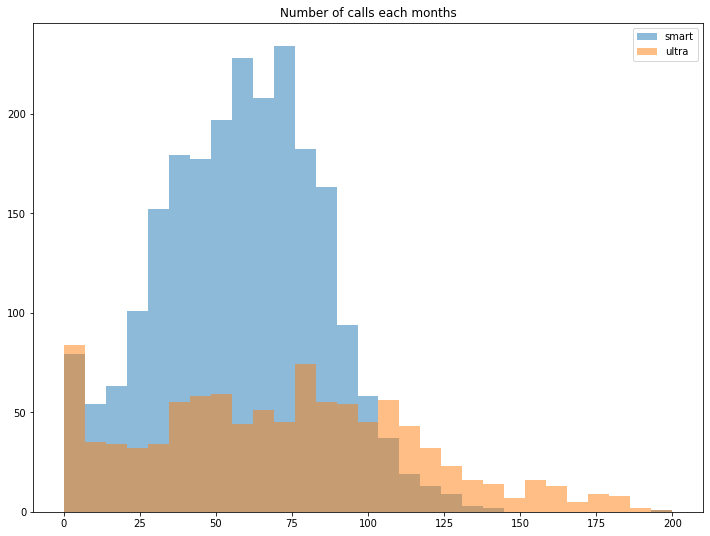

In [80]:
bins = np.linspace(0, 200, 30)
x = overall.query('tariff == "smart"')
y = overall.query('tariff == "ultra"')


fig, axes = plt.subplots(facecolor='white', figsize=(12,9))

plt.hist(x['calls'], bins, alpha=0.5, label='smart', axes=axes)
plt.hist(y['calls'], bins, alpha=0.5, label='ultra', axes=axes)
plt.legend(loc='upper right')
plt.title('Number of calls each months')


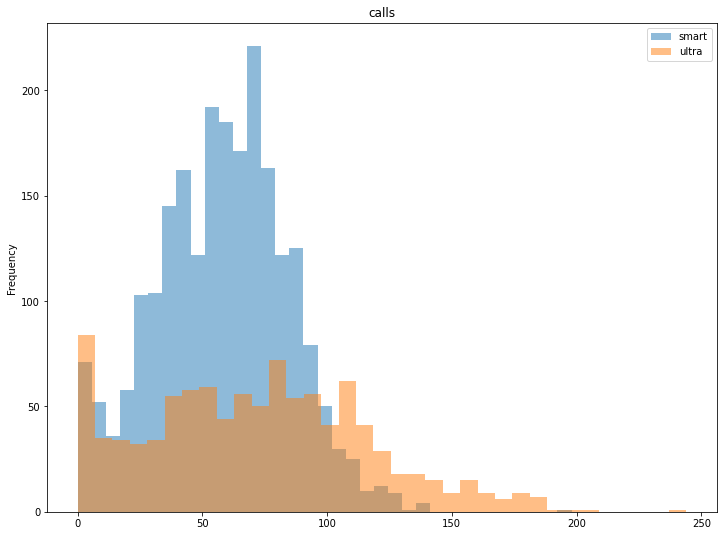

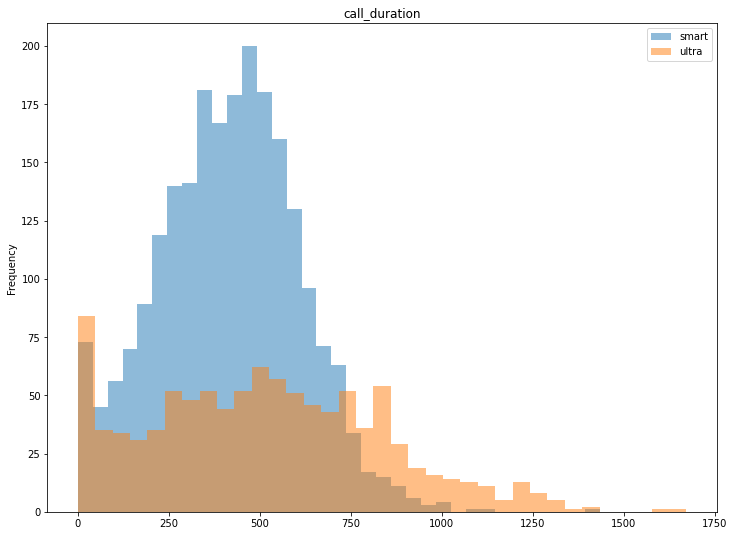

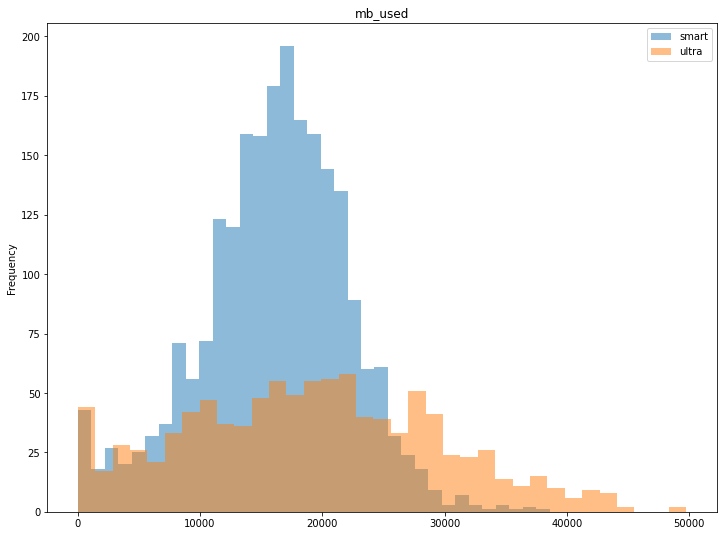

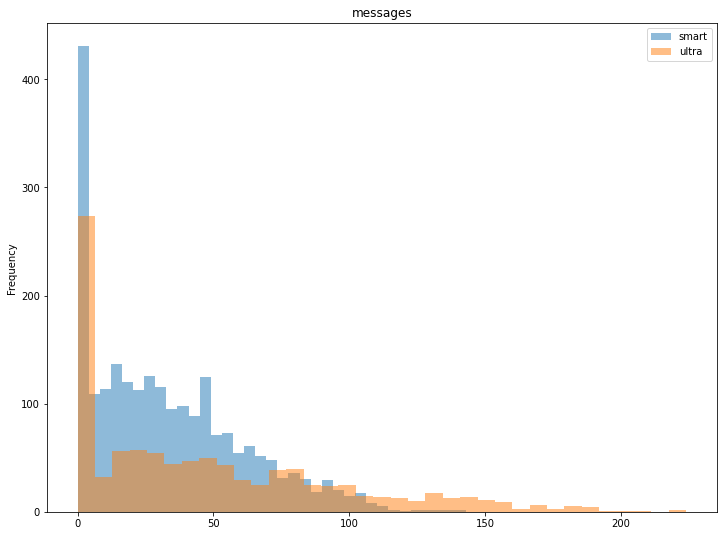

In [81]:
import matplotlib.pyplot as plt
for i in ['calls', 'call_duration', 'mb_used', 'messages']:
    fig, axes = plt.subplots(facecolor='white', figsize=(12,9))
    overall.groupby('tariff')[i].plot.hist(alpha=0.5, legend=True, bins=35, ax=axes)
    plt.title(i)

Text(0.5, 1.0, 'Revenue per month')

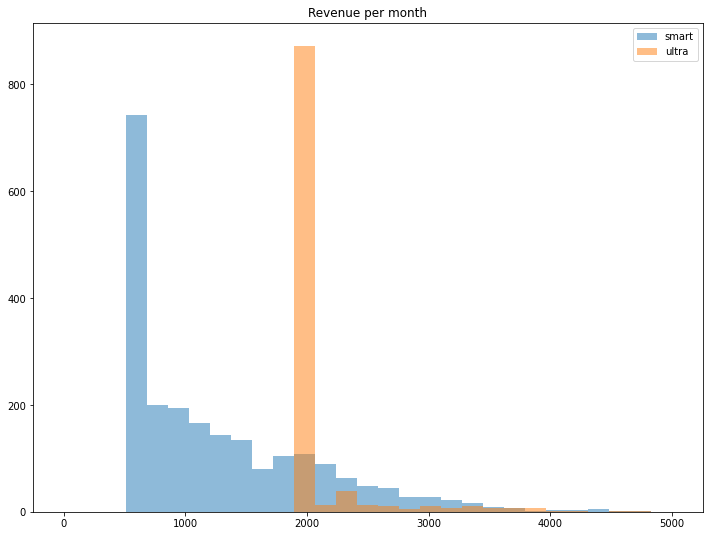

In [82]:
bins = np.linspace(0, 5000, 30)
x = overall.query('tariff == "smart"')
y = overall.query('tariff == "ultra"')

fig, axes = plt.subplots(facecolor='white', figsize=(12,9))

plt.hist(x['revenue'], bins, alpha=0.5, label='smart')
plt.hist(y['revenue'], bins, alpha=0.5, label='ultra')
plt.legend(loc='upper right')
plt.title('Revenue per month')


<b>Conclusions</b>

The graphs demonstrate the differences between the distributions for all analyzed indicators.

According to the analyzed indicators, it can be seen that the variance of Ultra is much larger, while the average use of each services  is greater, which makes sense.

The substatial difference in the distribution of revenue - there is a greater chance that Users of Ultra tariff will not pay for additional services (since the limits on prepaid ones are quite high) 

## Step 4. Test the hypotheses

### Average revenue of Ultra and Smart tariffs users differs

In [83]:
x =['call_duration', 'calls', 'calls_0min', 'mb_used', 'messages',\
    'call_duration_e', 'calls_e', 'calls_0min_e', 'mb_used_e', 'messages_e', 'revenue']

In [84]:
y =['Duration of calls', 'Number of calls', 'Dropped calls', 'Internet volume', 'Number of sms',\
     'Call duration (estimate)', 'Number of calls (estimate)', 'Dropped calls (estimate)', \
     'Internet Volume (Estimate)', 'SMS Count (Estimate)', 'Revenue']

In [85]:
parametrs = {}
for i in range(len(x)):
    parametrs[x[i]] = y[i]

In [86]:
ultradf = overall.query('tariff == "ultra"')
smartdf = overall.query('tariff == "smart"')
alpha = 0.001
x = []
for parametr in parametrs:
    results = st.ttest_ind(ultradf[parametr], smartdf[parametr])
    if results.pvalue < alpha:
        y = "reject H0"
    else:
        y = "Can't reject Н0"   
    x.append((parametrs[parametr], results.pvalue, y, ultradf[parametr].mean(), smartdf[parametr].mean()))

In [87]:
results =pd.DataFrame(x,columns=['Indicator','p-value', 'Result', 'AVG Ultra', 'AVG Smart'])

In [88]:
results

,Indicator,p-value,Result,AVG Ultra,AVG Smart
0,Duration of calls,2.109028e-28,reject H0,515.630219,413.482912
1,Number of calls,2.633810e-28,reject H0,71.860835,57.840657
2,Dropped calls,2.766881e-19,reject H0,13.860835,11.393253
3,Internet volume,5.820487e-25,reject H0,19080.117296,16056.307590
4,Number of sms,1.989348e-29,reject H0,48.333002,33.028407
5,Call duration (estimate),1.736927e-07,reject H0,589.998012,470.274745
6,Number of calls (estimate),8.704803e-08,reject H0,82.170974,65.653795
7,Dropped calls (estimate),1.387095e-07,reject H0,15.894632,12.819352
8,Internet Volume (Estimate),1.738277e-05,reject H0,22010.067594,18279.726587
9,SMS Count (Estimate),1.108995e-20,reject H0,54.974155,36.648025


<b>Conclusions</b>

For all analyzed parameters, including revenue, users of different tariffs show statistical differences.

Even with the lowest alpha, this situation persists

### The average revenue of users from Moscow differs from the revenue of users from other regions

In [89]:
moscowdf = overall.query('city == "Москва"')
not_moscowdf = overall.query('city != "Москва"')
alpha = 0.05
x = []
for parametr in parametrs:
    results = st.ttest_ind(moscowdf[parametr], not_moscowdf[parametr])
    if results.pvalue < alpha:
        y = "reject H0"
    else:
        y = "Can't reject Н0"   
    x.append((parametrs[parametr], results.pvalue, y, moscowdf[parametr].mean(), not_moscowdf[parametr].mean()))
results =pd.DataFrame(x,columns=['Indicator','p-value', 'Result', 'AVG Moscow', 'AVG not Moscow'])
results

,Indicator,p-value,Result,AVG Moscow,AVG not Moscow
0,Duration of calls,0.034538,reject H0,463.836570,440.609618
1,Number of calls,0.039007,reject H0,64.695793,61.577054
2,Dropped calls,0.266778,Can't reject Н0,12.448220,12.086331
3,Internet volume,0.005047,reject H0,17780.365696,16804.692541
4,Number of sms,0.816248,Can't reject Н0,37.448220,37.823930
5,Call duration (estimate),0.849682,Can't reject Н0,511.386731,506.258993
6,Number of calls (estimate),0.896684,Can't reject Н0,71.135922,70.662628
7,Dropped calls (estimate),0.830273,Can't reject Н0,13.648867,13.796668
8,Internet Volume (Estimate),0.822895,Can't reject Н0,19617.077670,19387.731162
9,SMS Count (Estimate),0.812805,Can't reject Н0,41.857605,42.409693


In [90]:
overall.loc[overall['city'] == 'Москва', 'msc'] = 1
overall.loc[overall['city'] != 'Москва', 'msc'] = 0

In [91]:
x = pd.pivot_table(overall, values='calls', index='tariff', columns='msc', aggfunc='count')
x = x.T
x['count'] = x['smart'] + x['ultra']
x['smart'] = round(x['smart'] / x['count'] * 100, 0)
x['ultra'] = round(x['ultra'] / x['count'] * 100, 0)
x = x.T
x = x.rename(columns = {0.0:'not_msc', 1.0:'msc'}, inplace = False)
x

msc,not_msc,msc
tariff,,
smart,71.0,63.0
ultra,29.0,37.0
count,2641.0,618.0


In [92]:
moscowdf = overall.query('city == "Москва"')
not_moscowdf = overall.query('city != "Москва"')
alpha = 0.05
x = []
z = ['smart', 'ultra']
for tariff in z:
    for parametr in parametrs:
        results = st.ttest_ind(moscowdf.query('tariff == @tariff')[parametr],\
                               not_moscowdf.query('tariff == @tariff')[parametr])
        if results.pvalue < alpha:
            y = "reject H0"
        else:
            y = "Can't reject Н0"   
        x.append((tariff, parametrs[parametr], results.pvalue, y, \
                  moscowdf.query('tariff == @tariff')[parametr].mean(), \
                  not_moscowdf.query('tariff == @tariff')[parametr].mean()))
results =pd.DataFrame(x,columns=['Tariff', 'Indicatorr','p-value', 'Result', 'AVG Moscow', 'AVG not Moscow'])
results

,Tariff,Indicatorr,p-value,Result,AVG Moscow,AVG not Moscow
0,smart,Duration of calls,0.836834,Can't reject Н0,415.329897,413.098660
1,smart,Number of calls,0.938193,Can't reject Н0,57.935567,57.820912
2,smart,Dropped calls,0.290061,Can't reject Н0,11.097938,11.454692
3,smart,Internet volume,0.720574,Can't reject Н0,15955.840206,16077.209115
4,smart,Number of sms,0.000035,reject H0,27.628866,34.151743
5,smart,Call duration (estimate),0.979161,Can't reject Н0,469.693299,470.395710
6,smart,Number of calls (estimate),0.860170,Can't reject Н0,65.123711,65.764075
7,smart,Dropped calls (estimate),0.452323,Can't reject Н0,12.394330,12.907775
8,smart,Internet Volume (Estimate),0.647884,Can't reject Н0,17860.054124,18367.036461
9,smart,SMS Count (Estimate),0.010037,reject H0,32.018041,37.611260


<b> Conclusions </b>

* There are little statistical differences between Moscow and other cities. We see that Moscow has statistically significant higher use of phone calls and Internet. But one the reason for that is the different popularity of tariffs between to subsamples. 

* When we check the differences for each tariff separetly, the differences in phone calls vanish. Only in the use of sms and Internet usage we can find the difference between subsamples in that case

* So while it's true that phone calls stats in Moscow are higher the reason is that more people in Moscow use the more expensive tariff- 'ultra. When we compare people who use this tariff in Moscow with people from other cities - there is no difference between them in phone calls usage

### Tariff pofitability

What tariff can be called the most profitable for the operator?

There are several factorss we need to consider.

Smart tariff is cheaper, but they have much higher chance to spend additional services outside their limits.

To get profitability we need to assume the cost of company's services. The cheapest price for 1 minute, 1 gb and 1 message we have - is the price of them under ultra tariff. Let;s assume that the actual cost of this services is 10% if that price

In [93]:
x = pd.pivot_table(overall1, values=['message_exc', 'calls_exc', 'internet_exc'], index='tariff', aggfunc='mean')
print(x)

        calls_exc  internet_exc  message_exc
tariff                                      
smart    0.334665      0.581003     0.250333
ultra    0.000000      0.133201     0.000000


In [94]:
y = tariffs.query('tariff_name == "ultra"')
rub_per_minute = y.iloc[0]['rub_per_minute']
rub_per_message = y.iloc[0]['rub_per_message']
rub_per_gb = y.iloc[0]['rub_per_gb']
t = 0.1
overall['cost_est'] = overall['call_duration'] * rub_per_minute * t +\
overall['messages'] * rub_per_message * t + \
np.ceil(overall['mb_used'] / 1024) * rub_per_gb * t
overall['profit_est'] = overall['revenue'] -overall['cost_est'] 

The average profit for ultra is 70% higher. At the same time smart tariff gives a bigger overall profit

In [95]:
x = overall.groupby('tariff')['profit_est'].mean()
print(x)
print("Ultra's average is", round(x[1]/x[0]*100, 1), "% higher")

tariff
smart     999.279627
ultra    1725.368091
Name: profit_est, dtype: float64
Ultra's average is 172.7 % higher


In [96]:
x = overall.groupby('tariff')['profit_est'].sum()
print(x)
z= round(x[0]/(x[0]+x[1])*100,1)
print(z, '% of smart tariff in overall profit', 100-z, '% - ultra')

tariff
smart    2251377.0
ultra    1735720.3
Name: profit_est, dtype: float64
56.5 % of smart tariff in overall profit 43.5 % - ultra


In [97]:
x = []
for user in overall['user_id'].unique():
    profit = overall.query('user_id==@user')['profit_est'].sum()
    months = overall.query('user_id==@user')['profit_est'].count()
    x.append((user, profit / months, users.query('user_id == @user').iloc[0]['tariff']))

In [98]:
x = pd.DataFrame(data=x, columns=['user', 'profit', 'tariff'])

At the same time most of the most proffitable client's are those who use smart tariff, but spend over allocated limits

In [99]:
x.sort_values(by='profit', ascending=False).head(15)

,user,profit,tariff
486,1486,3892.033333,smart
261,1261,3236.366667,smart
42,1042,2751.950000,smart
124,1124,2659.125000,ultra
172,1172,2600.537500,smart
304,1304,2592.750000,ultra
286,1286,2592.200000,smart
159,1159,2574.950000,smart
456,1456,2487.080000,smart
185,1185,2485.666667,ultra


(500.0, 4000.0)

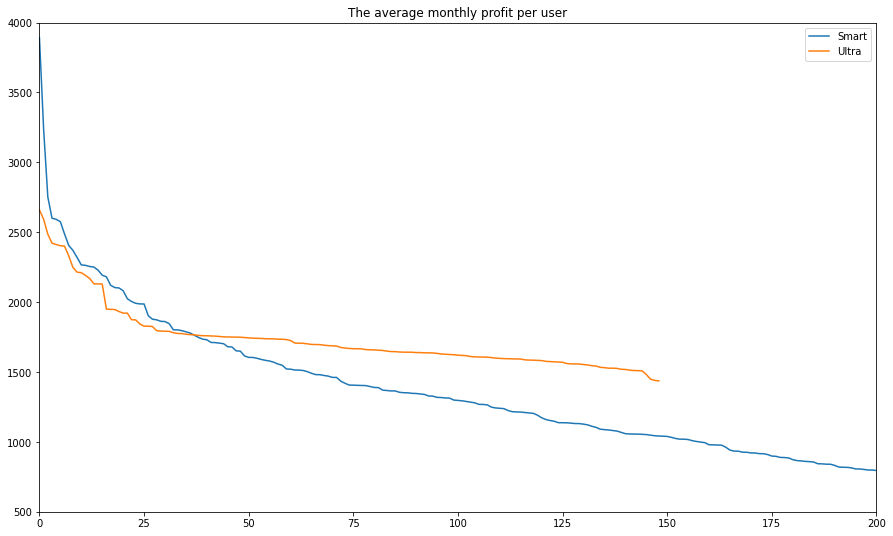

In [100]:
fig, axes = plt.subplots(facecolor='white', figsize=(15,9))

x.query('tariff == "smart"').sort_values(by='profit', ascending=False).reset_index()['profit'].plot()
x.query('tariff == "ultra"').sort_values(by='profit', ascending=False).reset_index()['profit'].plot()
plt.title('The average monthly profit per user')
plt.legend(['Smart', 'Ultra'])
axes.set_xlim([0,200])
axes.set_ylim([500,4000])

In [101]:
overall.query('user_id==1486')

,user_id,month,month_share,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,mb_used_e,messages_e,calls_e,calls_0min_e,tariff,city,revenue,msc,cost_est,profit_est
3182,1486,10,0.032258,38.0,5.0,1.0,408.0,1.0,1178,12648,31,155,31,smart,Нижний Новгород,550.0,0.0,18.9,531.1
3183,1486,11,1.000000,764.0,108.0,24.0,36319.0,96.0,764,36319,96,108,24,smart,Нижний Новгород,5680.0,0.0,626.0,5054.0
3184,1486,12,1.000000,1007.0,133.0,18.0,38610.0,83.0,1007,38610,83,133,18,smart,Нижний Новгород,6770.0,0.0,679.0,6091.0


In [102]:
overall.query('user_id==1261')

,user_id,month,month_share,call_duration,calls,calls_0min,mb_used,messages,call_duration_e,mb_used_e,messages_e,calls_e,calls_0min_e,tariff,city,revenue,msc,cost_est,profit_est
1670,1261,10,0.064516,9.0,3.0,0.0,1848.0,1.0,139,28644,15,46,0,smart,Казань,550.0,0.0,31.0,519.0
1671,1261,11,1.000000,738.0,117.0,35.0,32542.0,25.0,738,32542,25,117,35,smart,Казань,4664.0,0.0,556.3,4107.7
1672,1261,12,1.000000,1074.0,141.0,28.0,32697.0,22.0,1074,32697,22,141,28,smart,Казань,5672.0,0.0,589.6,5082.4


<b> Conclusions </b>

* Ultra is a more profitable per user on average, but smart is a more popular and bring higher percentage of overall profit 

* At the same time the most profitable clients (around 35 in our sample) are smart clients, who spend over their limits of calls/messages and especially Internet

## Overall conclusion

1. All tasks were completed
2. Analyzed samples show differences in most indicators between 2 tariffs
3. Ultra clients in all aspects use cellular communication more actively.
* They use phone calls ~21% more actively
* They use Internet Ultra clients are more scattered: there is a part of users (1 quartile) who do not actively use it (despite the larger limit, they use it to a lesser extent than smart clients), but the 3 quartile - on the contrary, uses 33% more
* Messages - they use about 30% more actively (but again, there is a group of people who practically do not use SMS on ultra (see 1 quartile)
* The total revenue from Ultra customers is 92% higher on the median and 60% higher on average - this is most likely due to the fact. how the revenue of different quartiles correlates - in the lowest quartile - they pay 3.5 times more, in the second quartile - they pay 92% more, in the 3 quartile they are much closer in revenue - ultra clients pay 11% more. Finally, the maximum revenue for smart is higher than for ultra - this is due to more expensive options for additional minutes, GB and messages and smaller overall limits.
* The smaller overall limits is confirmed by the share of clients that exceed them - only 13% Ultra user buy additional Internet traffic and almost 60% for Smart (33% for calls and 25% for messages)
4. For all analyzed indicators, including revenue, tariffs are statistically different.
5. The difference between Moscow and nonMoscow users could be partially explained by the higher use of ultra tariff among Moscow users. If we account for that the diffrence between them - in using SMS messages
6. Ultra is a more profitable per user on average, but smart is a more popular and bring higher percentage of overall profit 